<a href="https://colab.research.google.com/github/HungTranqm11/bird-classification/blob/main/Bird_Classification_using_tranfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bird Classification**

## Connect google drive and download data on Kaggle

In [1]:
import pathlib 
import glob 

In [2]:
# Connect to my google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Upload the file "kaggle.json" file 
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shinjikido","key":"7907b2c9645a1dfe3f7cf84b98051fb1"}'}

In [4]:
# Install kaggle package
!pip install --upgrade --force-reinstall --no-deps kaggle

# Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # set permission

     |████████████████████████████████| 58 kB 2.2 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=4eac992f33389abd00d11087aa20565da073e578f314293cc29c083ac2150477
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [5]:
# download data on Kaggle with option -p to choose the destination
!kaggle datasets download -d gpiosenka/100-bird-species

 98% 1.06G/1.08G [00:28<00:00, 43.7MB/s]
100% 1.08G/1.08G [00:28<00:00, 40.1MB/s]


In [6]:
# Now you can Unzip it!
!unzip -q /content/100-bird-species.zip -d '/content/Bird_classification'

## Create and overview train, valid, test data

In [7]:
import zipfile
import os
import shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [15]:
base_dir = '/content/Bird_classification'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')
df = pd.read_csv('/content/Bird_classification/Bird Species.csv')

In [16]:
# Overview class data on train, valid, test 
train_dir_ls = os.listdir(train_dir)
Validation_dir_ls = os.listdir(validation_dir)
test_dir_ls = os.listdir(test_dir)

print(train_dir_ls[:10])
print(Validation_dir_ls[:10])
print(test_dir_ls[:10])

['CURL CRESTED ARACURI', 'PARADISE TANAGER', 'NORTHERN SHOVELER', 'BLACK THROATED BUSHTIT', 'HORNED SUNGEM', 'SPLENDID WREN', 'BROWN CREPPER', 'HAWAIIAN GOOSE', 'MALEO', 'OVENBIRD']
['CURL CRESTED ARACURI', 'PARADISE TANAGER', 'NORTHERN SHOVELER', 'BLACK THROATED BUSHTIT', 'HORNED SUNGEM', 'SPLENDID WREN', 'BROWN CREPPER', 'HAWAIIAN GOOSE', 'MALEO', 'OVENBIRD']
['CURL CRESTED ARACURI', 'PARADISE TANAGER', 'NORTHERN SHOVELER', 'BLACK THROATED BUSHTIT', 'HORNED SUNGEM', 'SPLENDID WREN', 'BROWN CREPPER', 'HAWAIIAN GOOSE', 'MALEO', 'OVENBIRD']


In [ ]:
# we have total 300 classes
print('Total training bird images:', len(train_dir_ls))
print('Total valid bird images:', len(Validation_dir_ls))
print('Total test bird images:', len(test_dir_ls))

Total training bird images: 300
Total valid bird images: 300
Total test bird images: 300


In [ ]:
# overview data for each label
for i in os.listdir(train_dir):
    x = train_dir +'/'+ str(i)
    print("Total No of Images in {} are: {}".format(str(i),len(x)))

Total No of Images in PEACOCK are: 42
Total No of Images in VIOLET GREEN SWALLOW are: 55
Total No of Images in SRI LANKA BLUE MAGPIE are: 56
Total No of Images in MALAGASY WHITE EYE are: 53
Total No of Images in HAWAIIAN GOOSE are: 49
Total No of Images in BORNEAN BRISTLEHEAD are: 54
Total No of Images in OCELLATED TURKEY are: 51
Total No of Images in STRIPPED MANAKIN are: 51
Total No of Images in SHOEBILL are: 43
Total No of Images in PINK ROBIN are: 45
Total No of Images in BIRD OF PARADISE are: 51
Total No of Images in GOLDEN EAGLE are: 47
Total No of Images in EASTERN TOWEE are: 48
Total No of Images in CUBAN TODY are: 45
Total No of Images in HORNED LARK are: 46
Total No of Images in COMMON STARLING are: 50
Total No of Images in MASKED BOOBY are: 47
Total No of Images in CHUKAR PARTRIDGE are: 51
Total No of Images in COMMON FIRECREST are: 51
Total No of Images in GREEN JAY are: 44
Total No of Images in BANANAQUIT are: 45
Total No of Images in CALIFORNIA GULL are: 50
Total No of Im

we have a picture of each class that is different, there is an imbalance here but not much

Found 43622 files belonging to 300 classes.


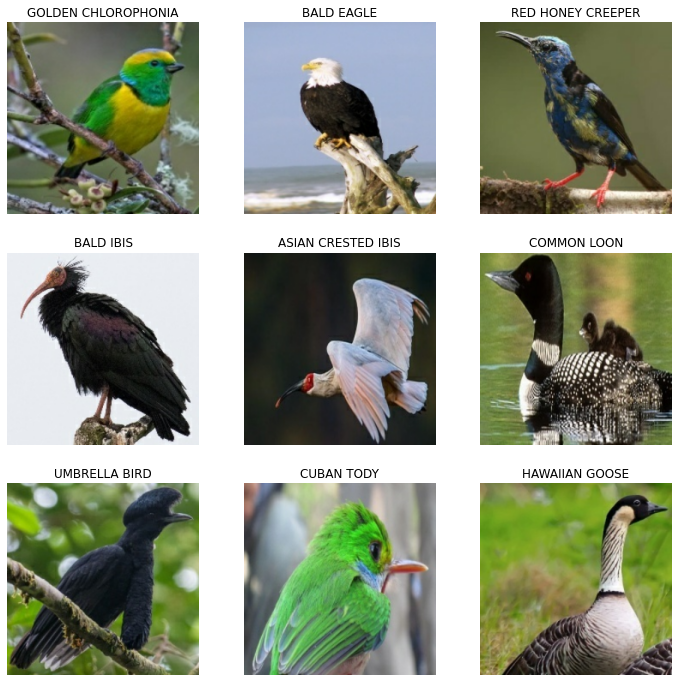

In [ ]:
# plot random image to view
image_size = (224, 224)
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_dir)
class_names = train_dataset.class_names

plt.figure(figsize=(12, 12))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# import library


In [48]:
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.applications import VGG16, MobileNet
from keras.applications.vgg16 import preprocess_input
from tensorflow import keras
from tensorflow.keras.models import  load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define my Model

In [ ]:
# Data augmented

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


train_generator = datagen.flow_from_directory(
                      train_dir,
                      target_size=(224, 224),
                      batch_size=32,
                      class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
                      validation_dir,
                      target_size=(224, 224),
                      batch_size=32,
                      class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
                      test_dir,
                      target_size=(224, 224),
                      batch_size=32,
                      class_mode='categorical')

Found 43622 images belonging to 300 classes.
Found 1500 images belonging to 300 classes.
Found 1500 images belonging to 300 classes.


In [ ]:
# check shape after data augmented
for data_batch, labels_batch in train_generator:
  print('Data batch shape:', data_batch.shape)
  print('Labels batch shape:', labels_batch.shape)
  break

Data batch shape: (32, 224, 224, 3)
Labels batch shape: (32, 300)


In [ ]:
# Create my model
model_bird = tf.keras.Sequential([
                              layers.Conv2D(96, (11,11), activation='relu', input_shape=(224,224,3)),
                              layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
                              layers.Conv2D(256, (5,5), activation='relu'),
                              layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
                              layers.Conv2D(384, (5,5), activation='relu'),
                              layers.Conv2D(384, (5,5), activation='relu'),
                              layers.Conv2D(256, (5,5), activation='relu'),
                              layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
                              layers.Flatten(),
                              layers.Dense(4096, activation='relu'),
                              layers.Dense(4096, activation='relu'),
                              layers.Dense(300, activation='softmax')
])

In [ ]:
# Learning decay and model complie
opt = tf.keras.optimizers.SGD(learning_rate=0.0001,
                              momentum=0.6,
                              nesterov=True)
model_bird.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

In [ ]:
# check summary of model
model_bird.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 214, 214, 96)      34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 106, 106, 96)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 102, 102, 256)     614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 384)       2457984   
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 42, 42, 384)       3686784   
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 38, 38, 256)      

In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_bird.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator,
                    callbacks=[ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.7,
                                 patience=2,
                                 verbose=1)])

Epoch 1/10
1364/1364 [==============================] - 540s 396ms/step - loss: 5.7034 - acc: 0.0037 - val_loss: 5.7031 - val_acc: 0.0027
Epoch 2/10
1364/1364 [==============================] - 534s 391ms/step - loss: 5.7019 - acc: 0.0046 - val_loss: 5.7023 - val_acc: 0.0053
Epoch 3/10
1364/1364 [==============================] - 528s 387ms/step - loss: 5.6999 - acc: 0.0057 - val_loss: 5.7013 - val_acc: 0.0067
Epoch 4/10
1364/1364 [==============================] - 523s 383ms/step - loss: 5.6966 - acc: 0.0063 - val_loss: 5.7001 - val_acc: 0.0053
Epoch 5/10
1364/1364 [==============================] - 524s 384ms/step - loss: 5.6913 - acc: 0.0060 - val_loss: 5.6991 - val_acc: 0.0053
Epoch 6/10
1364/1364 [==============================] - 525s 385ms/step - loss: 5.6852 - acc: 0.0063 - val_loss: 5.6973 - val_acc: 0.0053
Epoch 7/10
1364/1364 [==============================] - 523s 383ms/step - loss: 5.6790 - acc: 0.0061 - val_loss: 5.6914 - val_acc: 0.0040
Epoch 8/10
1364/1364 [============

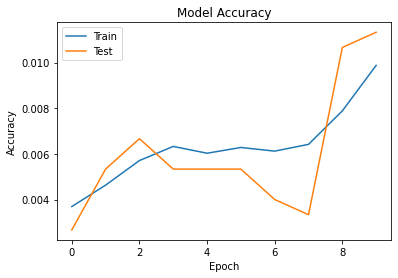

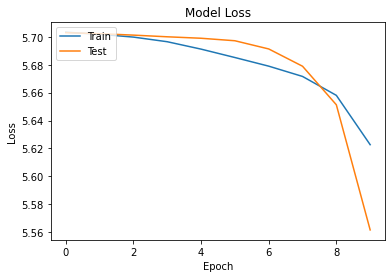

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Test'],loc='upper left')
plt.show()
#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train','Test'],loc='upper left')
plt.show()

# Mobienet

In [9]:
base_mobilenet = MobileNet(weights = 'imagenet',
                           include_top = False,
                           input_shape = (224,224,3))

17235968/17225924 [==============================] - 0s 0us/step


In [33]:
base_mobilenet.trainable = False

In [11]:
model_mobienet = Sequential()
# We add the base model as a new layer
model_mobienet.add(base_mobilenet)
model_mobienet.add(Flatten()) 
model_mobienet.add(Activation('relu'))
# 275 - number of classes
model_mobienet.add(Dense(300)) 
model_mobienet.add(Activation('softmax'))

In [12]:
model_mobienet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
activation (Activation)      (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 300)               15053100  
_________________________________________________________________
activation_1 (Activation)    (None, 300)               0         
Total params: 18,281,964
Trainable params: 15,053,100
Non-trainable params: 3,228,864
_________________________________________________________________


In [13]:
default_datagen = ImageDataGenerator(rescale=1./255)
image_size = (224,224)

In [17]:
augmentation_datagen = ImageDataGenerator(rescale=1./255, 
                                          rotation_range=20,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest') 
train_data = augmentation_datagen.flow_from_directory(train_dir, target_size=image_size)
validation_data = default_datagen.flow_from_directory(validation_dir, target_size=image_size)
test_data = default_datagen.flow_from_directory(test_dir, target_size=image_size)

Found 43622 images belonging to 300 classes.
Found 1500 images belonging to 300 classes.
Found 1500 images belonging to 300 classes.


In [18]:
# we want our learning rate to be adaptive
opt = tf.keras.optimizers.SGD(learning_rate=0.0001,
                              momentum=0.6,
                              nesterov=True)

model_mobienet.compile(optimizer = opt,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [19]:
history_mobienet = model_mobienet.fit(
    train_data,
    epochs = 20,
    validation_data = validation_data,
    validation_steps = 32,
    verbose = 1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.7,
                                 patience=2,
                                 verbose=1)])

Epoch 1/20
1364/1364 [==============================] - 453s 319ms/step - loss: 5.2661 - accuracy: 0.1208 - val_loss: 2.4679 - val_accuracy: 0.4482
Epoch 2/20
1364/1364 [==============================] - 434s 318ms/step - loss: 2.6635 - accuracy: 0.4129 - val_loss: 1.2966 - val_accuracy: 0.6719
Epoch 3/20
1364/1364 [==============================] - 433s 318ms/step - loss: 1.8767 - accuracy: 0.5564 - val_loss: 0.8903 - val_accuracy: 0.7695
Epoch 4/20
1364/1364 [==============================] - 435s 319ms/step - loss: 1.4931 - accuracy: 0.6355 - val_loss: 0.7080 - val_accuracy: 0.7988
Epoch 5/20
1364/1364 [==============================] - 435s 319ms/step - loss: 1.2710 - accuracy: 0.6831 - val_loss: 0.5786 - val_accuracy: 0.8369
Epoch 6/20
1364/1364 [==============================] - 435s 319ms/step - loss: 1.1295 - accuracy: 0.7173 - val_loss: 0.4867 - val_accuracy: 0.8623
Epoch 7/20
1364/1364 [==============================] - 434s 318ms/step - loss: 1.0063 - accuracy: 0.7442 - val_

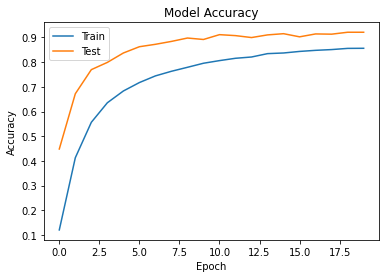

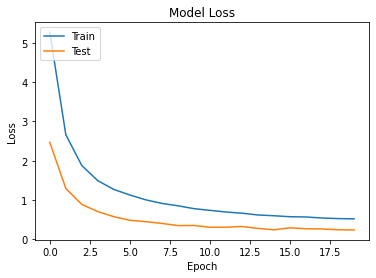

In [20]:
plt.plot(history_mobienet.history['accuracy'])
plt.plot(history_mobienet.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Test'],loc='upper left')
plt.show()
#Loss
plt.plot(history_mobienet.history['loss'])
plt.plot(history_mobienet.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [22]:
model_mobienet.evaluate(test_data)

47/47 [==============================] - 3s 55ms/step - loss: 0.1825 - accuracy: 0.9480


[0.18252618610858917, 0.9480000138282776]

# After 20 Epoch. Model mobienet predict 94% on test


# MobienetV2

In [46]:
# download model mobienetv2
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)
model_mobienetv2 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [51]:
# create data base again
BATCH_SIZE = 32
train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE
                                             )
val_dataset = image_dataset_from_directory(validation_dir,
                                          shuffle=True,
                                          batch_size=BATCH_SIZE,
                                          image_size=IMG_SIZE
                                          )
test_dataset = image_dataset_from_directory(test_dir,
                                            batch_size=BATCH_SIZE,
                                            image_size=IMG_SIZE)

Found 43622 files belonging to 300 classes.
Found 1500 files belonging to 300 classes.
Found 1500 files belonging to 300 classes.


In [53]:
val_batches = tf.data.experimental.cardinality(val_dataset)
test_dataset = val_dataset.take(val_batches // 5)
val_dataset = val_dataset.skip(val_batches // 5)
print('Number of validation batches: %d' % tf.data.experimental.cardinality(val_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 38
Number of test batches: 9


## Configure the dataset for performance

In [54]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

## data Augmentation

In [55]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

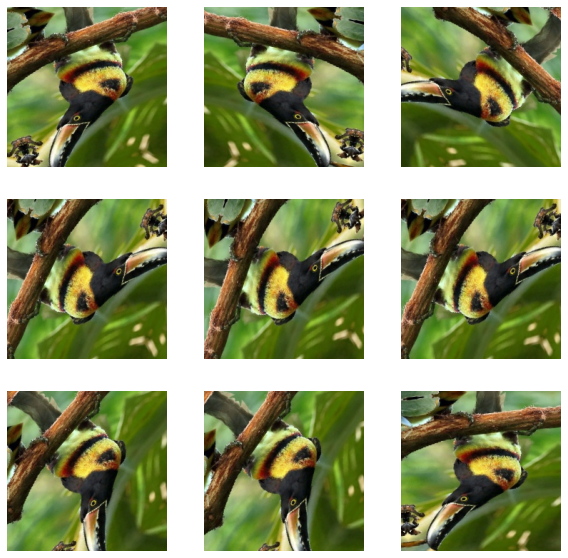

In [56]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [57]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

In [59]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = model_mobienetv2(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


In [60]:
model_mobienetv2.trainable = False

In [61]:
model_mobienetv2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [64]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [77]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = model_mobienetv2(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(300, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [78]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [79]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [80]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.truediv_3 (TFOpLambd (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract_3 (TFOpLamb (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0   

In [81]:
loss0, accuracy0 = model.evaluate(val_dataset)

38/38 [==============================] - 3s 30ms/step - loss: 5.9522 - accuracy: 0.0000e+00


In [82]:
initial_epochs = 10
history_mobienetv2 = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=val_dataset)

Epoch 1/10
1364/1364 [==============================] - 49s 35ms/step - loss: 3.9999 - accuracy: 0.2640 - val_loss: 2.5760 - val_accuracy: 0.6617
Epoch 2/10
1364/1364 [==============================] - 48s 35ms/step - loss: 2.1379 - accuracy: 0.6230 - val_loss: 1.4889 - val_accuracy: 0.8078
Epoch 3/10
1364/1364 [==============================] - 47s 35ms/step - loss: 1.4853 - accuracy: 0.7267 - val_loss: 1.0446 - val_accuracy: 0.8548
Epoch 4/10
1364/1364 [==============================] - 47s 35ms/step - loss: 1.1838 - accuracy: 0.7686 - val_loss: 0.8045 - val_accuracy: 0.8911
Epoch 5/10
1364/1364 [==============================] - 48s 35ms/step - loss: 0.9898 - accuracy: 0.7991 - val_loss: 0.6580 - val_accuracy: 0.9051
Epoch 6/10
1364/1364 [==============================] - 48s 35ms/step - loss: 0.8749 - accuracy: 0.8147 - val_loss: 0.5633 - val_accuracy: 0.9125
Epoch 7/10
1364/1364 [==============================] - 47s 35ms/step - loss: 0.7896 - accuracy: 0.8298 - val_loss: 0.5021 -

### Learning curves

Let's take a look at the learning curves of the training and validation accuracy/loss when using the MobileNet V2 base model as a fixed feature extractor.

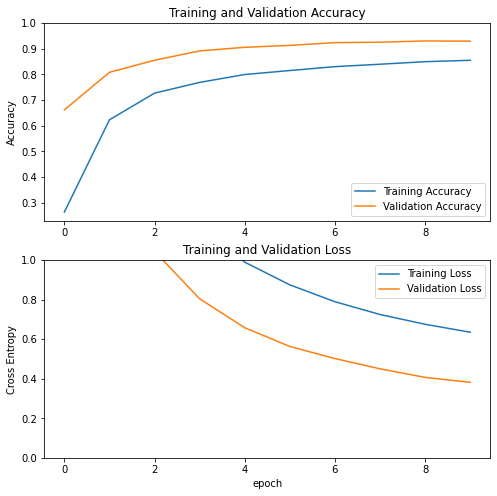

In [85]:
acc = history_mobienetv2.history['accuracy']
val_acc = history_mobienetv2.history['val_accuracy']

loss = history_mobienetv2.history['loss']
val_loss = history_mobienetv2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Fine tuning

In [86]:
model_mobienetv2.trainable = True

In [87]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(model_mobienetv2.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in model_mobienetv2.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  154


In [88]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [89]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.truediv_3 (TFOpLambd (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract_3 (TFOpLamb (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0   

In [92]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history_mobienetv2.epoch[-1],
                         validation_data=val_dataset)

Epoch 10/20
1364/1364 [==============================] - 72s 49ms/step - loss: 0.4573 - accuracy: 0.8777 - val_loss: 0.2009 - val_accuracy: 0.9439
Epoch 11/20
1364/1364 [==============================] - 66s 48ms/step - loss: 0.3918 - accuracy: 0.8929 - val_loss: 0.1628 - val_accuracy: 0.9505
Epoch 12/20
1364/1364 [==============================] - 66s 49ms/step - loss: 0.3479 - accuracy: 0.9043 - val_loss: 0.1482 - val_accuracy: 0.9554
Epoch 13/20
1364/1364 [==============================] - 67s 49ms/step - loss: 0.3171 - accuracy: 0.9130 - val_loss: 0.1310 - val_accuracy: 0.9604
Epoch 14/20
1364/1364 [==============================] - 66s 49ms/step - loss: 0.2987 - accuracy: 0.9182 - val_loss: 0.1394 - val_accuracy: 0.9596
Epoch 15/20
1364/1364 [==============================] - 66s 49ms/step - loss: 0.2730 - accuracy: 0.9249 - val_loss: 0.1142 - val_accuracy: 0.9629
Epoch 16/20
1364/1364 [==============================] - 66s 48ms/step - loss: 0.2591 - accuracy: 0.9276 - val_loss: 0

In [ ]:
model.save('model_mobienetv2')

INFO:tensorflow:Assets written to: model_mobienetv2/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [94]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

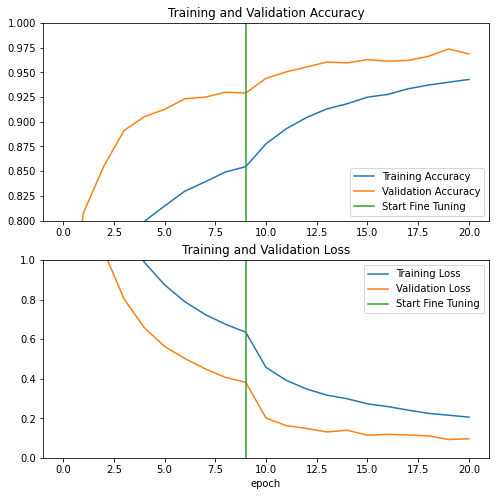

In [95]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Evaluation and prediction

Finaly you can verify the performance of the model on new data using test set.

In [96]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

9/9 [==============================] - 0s 30ms/step - loss: 0.1354 - accuracy: 0.9583
Test accuracy : 0.9583333134651184


And now you are all set to use this model to predict if your pet is a cat or dog.

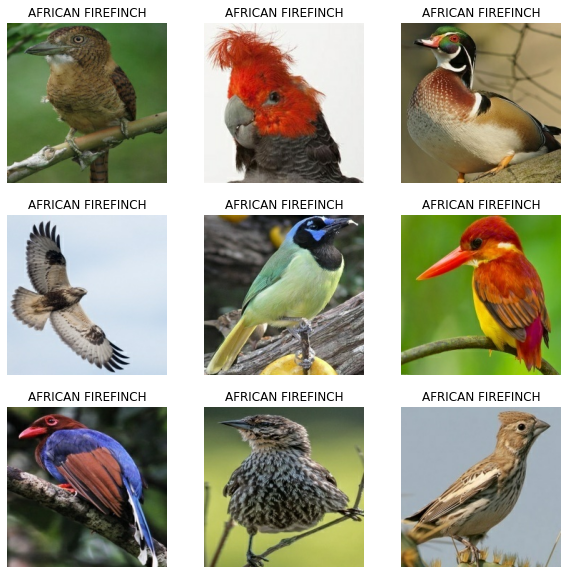

In [97]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")